<a href="https://colab.research.google.com/github/rihemmaarefe/big-data/blob/main/breast_cancer_analysis_with_spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spark Environment 

In [1]:
#install findspark
!pip install findspark

# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession 
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Load Dataset

In [4]:
from google.colab import files
files.upload()

Saving Breast_cancer_data.csv to Breast_cancer_data.csv


{'Breast_cancer_data.csv': b'mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis\r\n17.99,10.38,122.8,1001.0,0.1184,0\r\n20.57,17.77,132.9,1326.0,0.08474,0\r\n19.69,21.25,130.0,1203.0,0.1096,0\r\n11.42,20.38,77.58,386.1,0.1425,0\r\n20.29,14.34,135.1,1297.0,0.1003,0\r\n12.45,15.7,82.57,477.1,0.1278,0\r\n18.25,19.98,119.6,1040.0,0.09463,0\r\n13.71,20.83,90.2,577.9,0.1189,0\r\n13.0,21.82,87.5,519.8,0.1273,0\r\n12.46,24.04,83.97,475.9,0.1186,0\r\n16.02,23.24,102.7,797.8,0.08206,0\r\n15.78,17.89,103.6,781.0,0.0971,0\r\n19.17,24.8,132.4,1123.0,0.0974,0\r\n15.85,23.95,103.7,782.7,0.08401,0\r\n13.73,22.61,93.6,578.3,0.1131,0\r\n14.54,27.54,96.73,658.8,0.1139,0\r\n14.68,20.13,94.74,684.5,0.09867,0\r\n16.13,20.68,108.1,798.8,0.117,0\r\n19.81,22.15,130.0,1260.0,0.09831,0\r\n13.54,14.36,87.46,566.3,0.09779,1\r\n13.08,15.71,85.63,520.0,0.1075,1\r\n9.504,12.44,60.34,273.9,0.1024,1\r\n15.34,14.26,102.5,704.4,0.1073,0\r\n21.16,23.04,137.2,1404.0,0.09428,0\r\n16.65,21.38,110.0,9

In [5]:
df = spark.read.format("csv").option("header","true").option("inferSchema","true").option("mode","failfast").load("Breast_cancer_data.csv")

In [6]:
df.createOrReplaceTempView("fb")

# Analysis Using Spark

In [7]:
# Descover dataset's columns
print(df.columns)

print("      ")

#Columns in DataFrame
print( "Number of column:" , len(df.columns))

print("      ")

#Rows in DataFrame
print("Number of row:",df.count())

['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis']
      
Number of column: 6
      
Number of row: 569


In [8]:
# Show dataset details
spark.sql("select * from fb").show()

+-----------+------------+--------------+---------+---------------+---------+
|mean_radius|mean_texture|mean_perimeter|mean_area|mean_smoothness|diagnosis|
+-----------+------------+--------------+---------+---------------+---------+
|      17.99|       10.38|         122.8|   1001.0|         0.1184|        0|
|      20.57|       17.77|         132.9|   1326.0|        0.08474|        0|
|      19.69|       21.25|         130.0|   1203.0|         0.1096|        0|
|      11.42|       20.38|         77.58|    386.1|         0.1425|        0|
|      20.29|       14.34|         135.1|   1297.0|         0.1003|        0|
|      12.45|        15.7|         82.57|    477.1|         0.1278|        0|
|      18.25|       19.98|         119.6|   1040.0|        0.09463|        0|
|      13.71|       20.83|          90.2|    577.9|         0.1189|        0|
|       13.0|       21.82|          87.5|    519.8|         0.1273|        0|
|      12.46|       24.04|         83.97|    475.9|         0.11

In [9]:
spark.sql("select count(*) from fb").show()

+--------+
|count(1)|
+--------+
|     569|
+--------+



In [10]:
# Show the average mean_radius of each diagnosis
spark.sql("select avg(mean_radius), diagnosis from fb group by diagnosis").show()

+-----------------+---------+
| avg(mean_radius)|diagnosis|
+-----------------+---------+
|12.14652380952381|        1|
|17.46283018867925|        0|
+-----------------+---------+



In [11]:
# Drop the rows with missing values 
df.na.drop("all").show(truncate=False)

+-----------+------------+--------------+---------+---------------+---------+
|mean_radius|mean_texture|mean_perimeter|mean_area|mean_smoothness|diagnosis|
+-----------+------------+--------------+---------+---------------+---------+
|17.99      |10.38       |122.8         |1001.0   |0.1184         |0        |
|20.57      |17.77       |132.9         |1326.0   |0.08474        |0        |
|19.69      |21.25       |130.0         |1203.0   |0.1096         |0        |
|11.42      |20.38       |77.58         |386.1    |0.1425         |0        |
|20.29      |14.34       |135.1         |1297.0   |0.1003         |0        |
|12.45      |15.7        |82.57         |477.1    |0.1278         |0        |
|18.25      |19.98       |119.6         |1040.0   |0.09463        |0        |
|13.71      |20.83       |90.2          |577.9    |0.1189         |0        |
|13.0       |21.82       |87.5          |519.8    |0.1273         |0        |
|12.46      |24.04       |83.97         |475.9    |0.1186       

In [12]:
# Correlation between two columns
df.stat.corr("mean_texture","mean_radius")

0.3237818909277333

# Data Preparation

In [13]:
df.describe().show()

+-------+------------------+-----------------+-----------------+-----------------+--------------------+------------------+
|summary|       mean_radius|     mean_texture|   mean_perimeter|        mean_area|     mean_smoothness|         diagnosis|
+-------+------------------+-----------------+-----------------+-----------------+--------------------+------------------+
|  count|               569|              569|              569|              569|                 569|               569|
|   mean|14.127291739894563|19.28964850615117|91.96903339191566|654.8891036906857|   0.096360281195079|0.6274165202108963|
| stddev|3.5240488262120793|4.301035768166948| 24.2989810387549|351.9141291816529|0.014064128137673616|0.4839179564031685|
|    min|             6.981|             9.71|            43.79|            143.5|             0.05263|                 0|
|    max|             28.11|            39.28|            188.5|           2501.0|              0.1634|                 1|
+-------+-------

In [14]:
#Remove missing values
dataDF_remove = df.na.drop()

In [15]:
dataDF_remove.describe().show()

+-------+------------------+-----------------+-----------------+-----------------+--------------------+------------------+
|summary|       mean_radius|     mean_texture|   mean_perimeter|        mean_area|     mean_smoothness|         diagnosis|
+-------+------------------+-----------------+-----------------+-----------------+--------------------+------------------+
|  count|               569|              569|              569|              569|                 569|               569|
|   mean|14.127291739894563|19.28964850615117|91.96903339191566|654.8891036906857|   0.096360281195079|0.6274165202108963|
| stddev|3.5240488262120793|4.301035768166948| 24.2989810387549|351.9141291816529|0.014064128137673616|0.4839179564031685|
|    min|             6.981|             9.71|            43.79|            143.5|             0.05263|                 0|
|    max|             28.11|            39.28|            188.5|           2501.0|              0.1634|                 1|
+-------+-------

# Classification

# Features Column

In [16]:
cols = ['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','diagnosis']

In [17]:
df = df.na.drop() # Spark drops rows with missing values
df.count(), len(df.columns)

(569, 6)

In [18]:
from pyspark.ml.feature import Binarizer

binarizer = Binarizer(threshold=24.99999, inputCol="mean_radius", outputCol="lable")
binarizedDataFrame = binarizer.transform(df)
binarizedDataFrame.select("mean_radius","lable").show(4)

+-----------+-----+
|mean_radius|lable|
+-----------+-----+
|      17.99|  0.0|
|      20.57|  0.0|
|      19.69|  0.0|
|      11.42|  0.0|
+-----------+-----+
only showing top 4 rows



In [19]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, VectorIndexer

assembler = VectorAssembler(inputCols=cols, outputCol="features")
assembled = assembler.transform(binarizedDataFrame)

# Test and Training Data

In [20]:
from pyspark.sql import SQLContext
from pyspark.sql import DataFrameNaFunctions
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
import pandas as pd

In [21]:
# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = assembled.randomSplit([0.8,0.2], seed = 13234 )

# Samples in each set:
trainingData.count(), testData.count()

(451, 118)

## Decision Tree in Spark

In [22]:
# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="lable", featuresCol="features",
                 maxDepth=5,  minInstancesPerNode=20, 
                impurity="gini")

# Pipeline
pipeline = Pipeline(stages=[dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

predictions.select("prediction", "lable").show(10)

+----------+-----+
|prediction|lable|
+----------+-----+
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
+----------+-----+
only showing top 10 rows



In [23]:
# write the predictions to a CSV for evaluation
predictions.select("prediction", "lable").toPandas().to_csv("predictions.csv")

# evaluation of ML models

In [24]:
from pyspark.sql import SQLContext
from sklearn.metrics import confusion_matrix
from pyspark import SparkContext

## The Accuracy of Decision Tree model

In [25]:
from pyspark.sql import SQLContext, Row, SparkSession
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [26]:
# Read the predictions CSV file
sqlContext = SQLContext(sc)
predictions = sqlContext.read.load('/content/predictions.csv', 
                          format='com.databricks.spark.csv', 
                          header='true',inferSchema='true')

In [27]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="lable", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))
print("Accuracy = %g " % (accuracy))

Test Error = 0.00847458 
Accuracy = 0.991525 


In [28]:
confusion_matrix(predictions.select('prediction').toPandas(), predictions.select('lable').toPandas())

array([[117,   1],
       [  0,   0]])

# Clustering

In [29]:
from pyspark.sql import SQLContext
from pyspark.sql import DataFrameNaFunctions
import pandas as pd
from pyspark.ml.clustering import KMeans
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("/content/Breast_cancer_data.csv")

In [31]:
df["id"] = df.index + 1

df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,id
0,17.99,10.38,122.80,1001.0,0.11840,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0,2
2,19.69,21.25,130.00,1203.0,0.10960,0,3
3,11.42,20.38,77.58,386.1,0.14250,0,4
4,20.29,14.34,135.10,1297.0,0.10030,0,5
...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0,565
565,20.13,28.25,131.20,1261.0,0.09780,0,566
566,16.60,28.08,108.30,858.1,0.08455,0,567
567,20.60,29.33,140.10,1265.0,0.11780,0,568


In [32]:
df.to_csv('breastCancerData.csv')

In [33]:
sqlContext = SQLContext(sc)

In [34]:
df = sqlContext.read.load('/content/breastCancerData.csv', 
                          format='com.databricks.spark.csv', 
                          header='true',inferSchema='true')

In [35]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
_c0,569,284.0,164.40042579020286,0,568
mean_radius,569,14.127291739894563,3.5240488262120793,6.981,28.11
mean_texture,569,19.28964850615117,4.301035768166948,9.71,39.28
mean_perimeter,569,91.96903339191566,24.2989810387549,43.79,188.5
mean_area,569,654.8891036906857,351.9141291816529,143.5,2501.0
mean_smoothness,569,0.096360281195079,0.014064128137673616,0.05263,0.1634
diagnosis,569,0.6274165202108963,0.4839179564031685,0,1
id,569,285.0,164.40042579020286,1,569


In [36]:
df.count()

569

In [37]:
#Re-sample to take every 10th value 
filtered = df.filter((df._c0 % 10) == 0)
T=filtered.count()
T

57

In [38]:
cols = ['_c0','mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','diagnosis','id']

In [39]:
# ASSEMBLE all the features.
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=cols, outputCol="features_pre")
assembled = assembler.transform(df)

In [40]:
# SCALE the dataset.
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol="features_pre", outputCol="features",withStd=True, withMean=True)
# Fit the StandardScaler
scalerModel = scaler.fit(assembled)
# Normalize each feature
scaledData = scalerModel.transform(assembled)

# Clustering using selected k

In [41]:
# Keep features and leave other columns
scaledData = scaledData.select("features", "_c0")

In [42]:
vecAssembler = VectorAssembler(inputCols=cols, outputCol="features")
df_kmeans = vecAssembler.transform(df).select('_c0', 'features')
df_kmeans.show()

+---+--------------------+
|_c0|            features|
+---+--------------------+
|  0|[0.0,17.99,10.38,...|
|  1|[1.0,20.57,17.77,...|
|  2|[2.0,19.69,21.25,...|
|  3|[3.0,11.42,20.38,...|
|  4|[4.0,20.29,14.34,...|
|  5|[5.0,12.45,15.7,8...|
|  6|[6.0,18.25,19.98,...|
|  7|[7.0,13.71,20.83,...|
|  8|[8.0,13.0,21.82,8...|
|  9|[9.0,12.46,24.04,...|
| 10|[10.0,16.02,23.24...|
| 11|[11.0,15.78,17.89...|
| 12|[12.0,19.17,24.8,...|
| 13|[13.0,15.85,23.95...|
| 14|[14.0,13.73,22.61...|
| 15|[15.0,14.54,27.54...|
| 16|[16.0,14.68,20.13...|
| 17|[17.0,16.13,20.68...|
| 18|[18.0,19.81,22.15...|
| 19|[19.0,13.54,14.36...|
+---+--------------------+
only showing top 20 rows



In [43]:
# from pyspark.ml.clustering import KMeans
# from pyspark.ml.evaluation import ClusteringEvaluator

# # Make predictions
# predictions = model.transform(df_kmeans)

# # Evaluate clustering by computing Silhouette score
# evaluator = ClusteringEvaluator()

# silhouette = evaluator.evaluate(predictions)
# print("Silhouette with squared euclidean distance = " + str(silhouette))

In [44]:
# Train the machine learning model
k = 10
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans)
centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[1.44551724e+02 1.43102299e+01 1.93522989e+01 9.34775862e+01
 6.34198851e+02 9.84540230e-02 4.59770115e-01 1.45551724e+02]
[2.94166667e+02 2.34725000e+01 2.20075000e+01 1.57041667e+02
 1.70658333e+03 1.04745833e-01 0.00000000e+00 2.95166667e+02]
[4.41472222e+02 1.93936111e+01 2.16386111e+01 1.28066667e+02
 1.16972778e+03 1.01252778e-01 2.77777778e-02 4.42472222e+02]
[1.07626506e+02 1.11843012e+01 1.73863855e+01 7.20185542e+01
 3.89615663e+02 9.99889157e-02 8.55421687e-01 1.08626506e+02]
[1.67657143e+02 1.99025714e+01 2.26045714e+01 1.31611429e+02
 1.23625714e+03 9.98411429e-02 0.00000000e+00 1.68657143e+02]
[1.13333333e+02 1.74424444e+01 2.09391111e+01 1.14655556e+02
 9.48824444e+02 9.82835556e-02 2.22222222e-02 1.14333333e+02]
[2.84333333e+02 2.75833333e+01 2.22033333e+01 1.85833333e+02
 2.41666667e+03 1.10666667e-01 0.00000000e+00 2.85333333e+02]
[4.8668750e+02 1.1039425e+01 1.9567375e+01 7.0830500e+01 3.7722625e+02
 9.5172625e-02 1.0000000e+00 4.8768750e+02]
[4.434

In [45]:
# Assign clusters to events
transformed = model.transform(df_kmeans).select('_c0', 'prediction')
rows = transformed.collect()
print(rows[:3])

[Row(_c0=0, prediction=5), Row(_c0=1, prediction=4), Row(_c0=2, prediction=4)]


In [46]:
from pyspark.sql import SparkSession,SQLContext

spark = SparkSession.builder.appName("Basics").getOrCreate()
sc=spark.sparkContext
sqlContext = SQLContext(sc)
df_pred = sqlContext.createDataFrame(rows)
df_pred.show()

+---+----------+
|_c0|prediction|
+---+----------+
|  0|         5|
|  1|         4|
|  2|         4|
|  3|         3|
|  4|         4|
|  5|         3|
|  6|         5|
|  7|         0|
|  8|         3|
|  9|         3|
| 10|         5|
| 11|         5|
| 12|         5|
| 13|         5|
| 14|         0|
| 15|         0|
| 16|         0|
| 17|         5|
| 18|         4|
| 19|         0|
+---+----------+
only showing top 20 rows



In [47]:
# Join the prediction with the original data
df_pred = df_pred.join(df, '_c0')
df_pred.show()

+---+----------+-----------+------------+--------------+---------+---------------+---------+---+
|_c0|prediction|mean_radius|mean_texture|mean_perimeter|mean_area|mean_smoothness|diagnosis| id|
+---+----------+-----------+------------+--------------+---------+---------------+---------+---+
|  0|         5|      17.99|       10.38|         122.8|   1001.0|         0.1184|        0|  1|
|  1|         4|      20.57|       17.77|         132.9|   1326.0|        0.08474|        0|  2|
|  2|         4|      19.69|       21.25|         130.0|   1203.0|         0.1096|        0|  3|
|  3|         3|      11.42|       20.38|         77.58|    386.1|         0.1425|        0|  4|
|  4|         4|      20.29|       14.34|         135.1|   1297.0|         0.1003|        0|  5|
|  5|         3|      12.45|        15.7|         82.57|    477.1|         0.1278|        0|  6|
|  6|         5|      18.25|       19.98|         119.6|   1040.0|        0.09463|        0|  7|
|  7|         0|      13.71|  

In [48]:
# Convert to Pandas dataframe
pddf_pred = df_pred.toPandas().set_index('_c0')
pddf_pred.head()

,prediction,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,id
_c0,,,,,,,,
0,5,17.99,10.38,122.80,1001.0,0.11840,0,1
1,4,20.57,17.77,132.90,1326.0,0.08474,0,2
2,4,19.69,21.25,130.00,1203.0,0.10960,0,3
3,3,11.42,20.38,77.58,386.1,0.14250,0,4
4,4,20.29,14.34,135.10,1297.0,0.10030,0,5


# vizualisation 

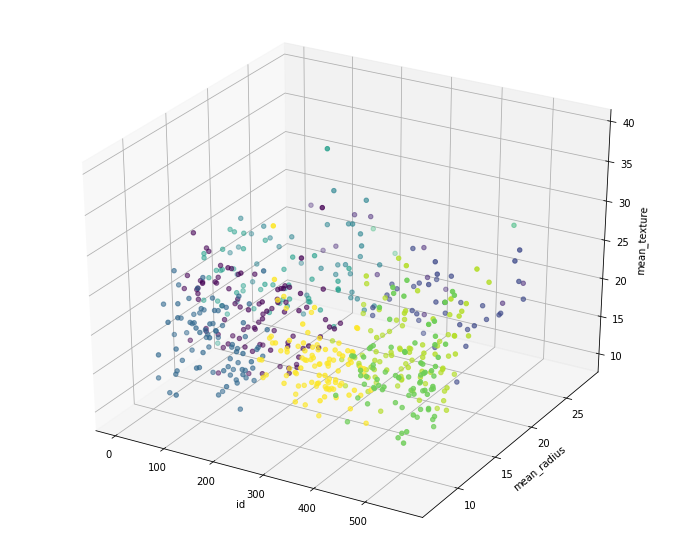

In [49]:
# Visualize the results
threedee = plt.figure(figsize=(12,10)).gca(projection='3d')
threedee.scatter(pddf_pred.id, pddf_pred.mean_radius, pddf_pred.mean_texture, c=pddf_pred.prediction)
threedee.set_xlabel('id')
threedee.set_ylabel('mean_radius')
threedee.set_zlabel('mean_texture')
plt.show()

In [50]:
import numpy as np

In [51]:
# List of Features and Prediction
colss = ['_c0','mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','diagnosis','id']
colNames = list(colss)
colNames.append('prediction')

In [52]:
# Get the cluster centers
C = model.clusterCenters()

# Zip with a column called 'prediction' (index)
Z = [np.append(A, index) for index, A in enumerate(C)]

# Convert to pandas for plotting
P = pd.DataFrame(Z, columns=colNames)
P['prediction'] = P['prediction'].astype(int)

P

,_c0,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,id,prediction
0,144.551724,14.310230,19.352299,93.477586,634.198851,0.098454,0.459770,145.551724,0
1,294.166667,23.472500,22.007500,157.041667,1706.583333,0.104746,0.000000,295.166667,1
2,441.472222,19.393611,21.638611,128.066667,1169.727778,0.101253,0.027778,442.472222,2
3,107.626506,11.184301,17.386386,72.018554,389.615663,0.099989,0.855422,108.626506,3
4,167.657143,19.902571,22.604571,131.611429,1236.257143,0.099841,0.000000,168.657143,4
5,113.333333,17.442444,20.939111,114.655556,948.824444,0.098284,0.022222,114.333333,5
6,284.333333,27.583333,22.203333,185.833333,2416.666667,0.110667,0.000000,285.333333,6
7,486.687500,11.039425,19.567375,70.830500,377.226250,0.095173,1.000000,487.687500,7
8,443.471910,14.368090,19.354045,93.256067,641.085393,0.091869,0.764045,444.471910,8
9,307.464646,11.708465,17.354343,75.108687,425.035354,0.091142,0.969697,308.464646,9
